# Final Project: Tasten Klassifizierung anhand des Geräuchs mittels Keras und Tensorflow 
### Universität: Hochschule der Medien Stuttgart
**Fakultät für Berufsbegleitende Studiengänge**

**Studiengang:** Data Science

**Abgabedatum:** 01.30.2024

**Professor:** Johannes Maucher

**Student:** Raghid Allaham

## idea and approaches

## research question

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import json
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense,Input,Dropout,Flatten,Conv1D,MaxPool1D, AveragePooling1D
from tensorflow.keras.optimizers import SGD, Adam
import pandas as pd
import seaborn as sns
from imutils import paths
import cv2
import os
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical


from sklearn.metrics import confusion_matrix, classification_report


import librosa

In [33]:
# Laden einer .wav-Datei
audio_path = './Data/2_2024-01-13_15-34-22.wav'
audio, sr = librosa.load(audio_path, sr=None)


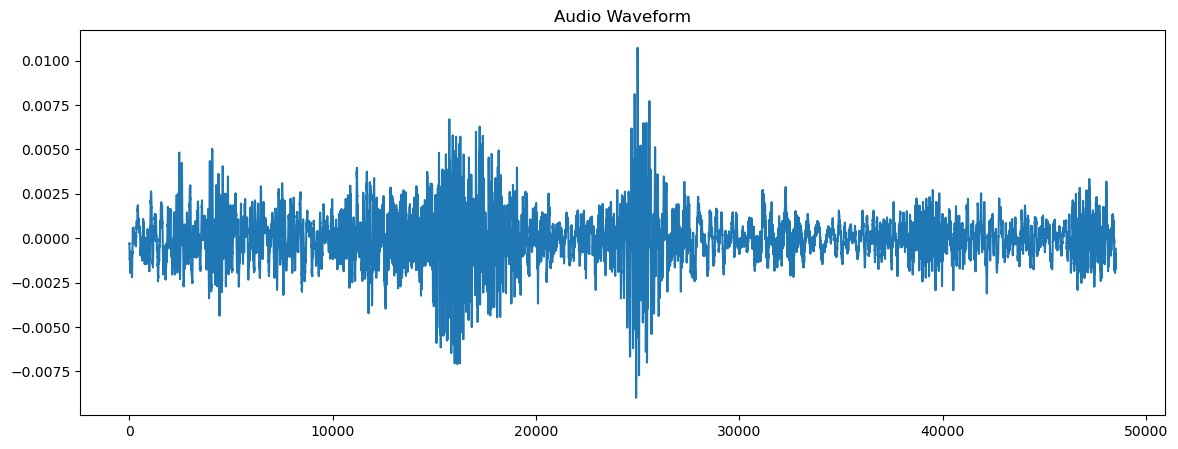

In [34]:
plt.figure(figsize=(14, 5))
plt.plot(audio)
plt.title('Audio Waveform')
plt.show()

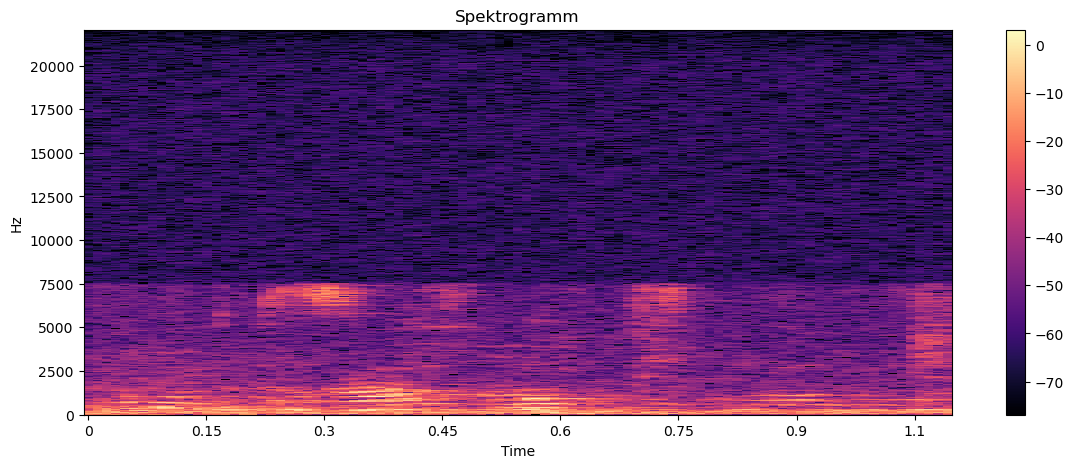

In [35]:
import librosa.display
import numpy as np

X = librosa.stft(audio)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title('Spektrogramm')
plt.show()


In [36]:
import os


base_path = './classes'  # Basispfad zu Ihren Audiodateien
classes = os.listdir(base_path)  # Liste der Klassennamen

data = []  # Liste zum Speichern der Audiodaten
labels = []  # Liste zum Speichern der zugehörigen Labels

for class_label in classes:
    class_path = os.path.join(base_path, class_label)
    if os.path.isdir(class_path):
        for file in os.listdir(class_path):
            if file.endswith('.wav'):
                file_path = os.path.join(class_path, file)
                audio, sr = librosa.load(file_path, sr=None)  # Laden der Audiodatei
                audio = audio / np.max(np.abs(audio))  # Normalisierung
                data.append(audio)
                labels.append(int(class_label))


In [37]:
print(f"Data matrix shape: {len(data)} x {len(data[0])}")

Data matrix shape: 81 x 48510


In [38]:
classes

['1', '2', '3', '4', '5', '6', '7']

In [39]:
leng_data= len(data[0])
for i in data:
    if len(i)!=leng_data:
        print(i)
    

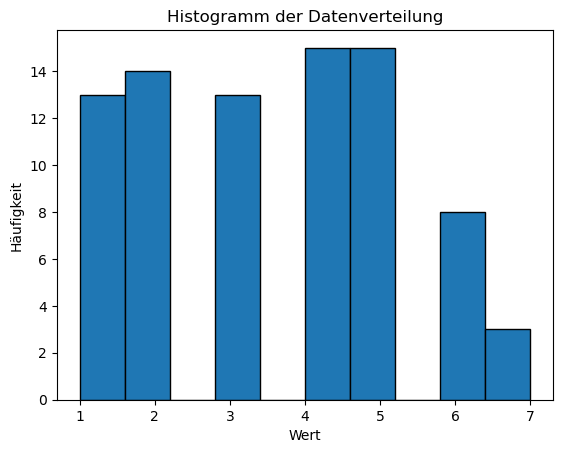

In [40]:
plt.hist(labels, edgecolor='black')
plt.title('Histogramm der Datenverteilung')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')
plt.show()

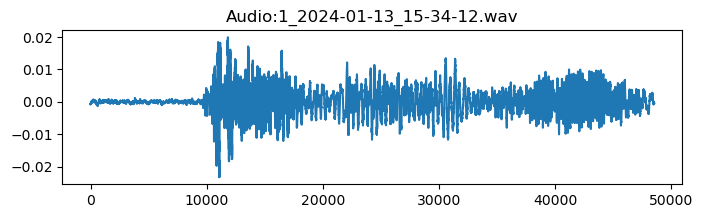

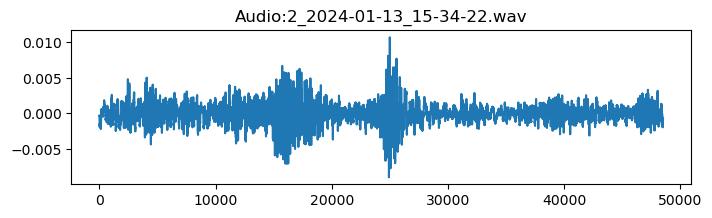

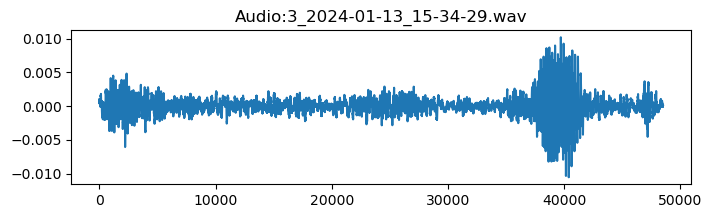

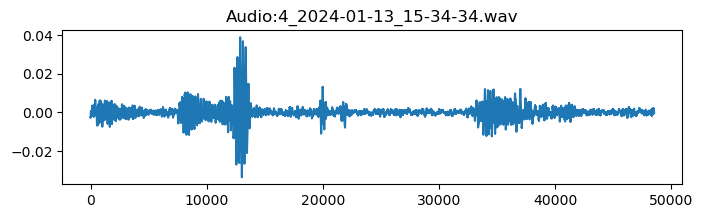

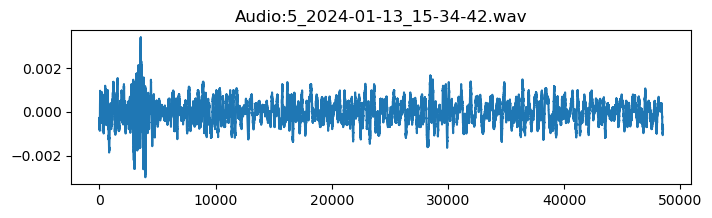

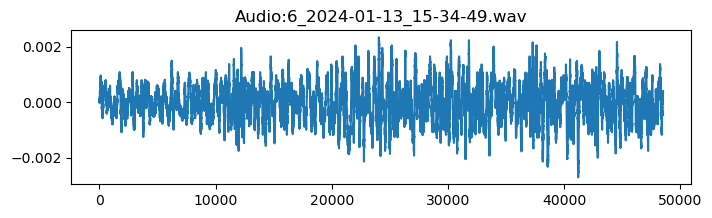

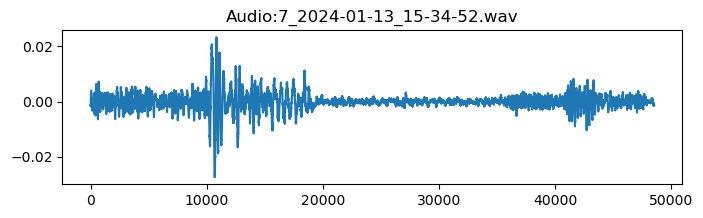

In [41]:
for cli, i in enumerate(classes):
    subfolder = "./classes/" + i
    wav = os.listdir(subfolder)[0]
    audio, sr = librosa.load(subfolder + "/" + wav, sr=None)
    plt.figure(figsize=(8, 2))
    plt.plot(audio)
    plt.title('Audio:' + wav)
plt.show()
    


In [42]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X = np.array(data) 
y = to_categorical(labels)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
from tensorflow.keras.layers import Conv1D, MaxPool1D

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, input_shape=(48510, 1), activation='relu'))
model.add(AveragePooling1D(pool_size=4))
model.add(Dropout(0.2))
model.add(Conv1D(filters=32, kernel_size=5, activation='relu',padding='same'))
model.add(MaxPool1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',padding='same'))
model.add(Dropout(0.2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',padding='same'))
model.add(Dropout(0.2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',padding='same'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_26 (Conv1D)          (None, 48508, 64)         256       
                                                                 
 average_pooling1d_5 (Avera  (None, 12127, 64)         0         
 gePooling1D)                                                    
                                                                 
 dropout_25 (Dropout)        (None, 12127, 64)         0         
                                                                 
 conv1d_27 (Conv1D)          (None, 12127, 32)         10272     
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 6063, 32)          0         
 g1D)                                                            
                                                                 
 conv1d_28 (Conv1D)          (None, 6063, 32)         

In [60]:
epochs = 14
lrate = 0.01
decay = lrate/epochs
sgd = SGD(learning_rate=lrate, momentum=0.8, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer= sgd, metrics=['accuracy'])

In [61]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5, mode='min', restore_best_weights=True)

In [62]:
print(len(X_val))
print(len(y_val))

y_train

25
25


array([[0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 

In [63]:
len(X) != len(y)

False

In [64]:
history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=3, callbacks=[early_stopping])
model.save("./Modell/audio_classifyer")

Epoch 1/14




19/19 [==============================] - 17s 792ms/step - loss: 2.1176 - accuracy: 0.2143 - val_loss: 2.0804 - val_accuracy: 0.0800
Epoch 2/14
19/19 [==============================] - 15s 787ms/step - loss: 2.0754 - accuracy: 0.1964 - val_loss: 1.9805 - val_accuracy: 0.0800
Epoch 3/14
19/19 [==============================] - 15s 763ms/step - loss: 2.0142 - accuracy: 0.1964 - val_loss: 1.9303 - val_accuracy: 0.0800
Epoch 4/14
19/19 [==============================] - 14s 745ms/step - loss: 1.9718 - accuracy: 0.1964 - val_loss: 2.0046 - val_accuracy: 0.0800
Epoch 5/14
19/19 [==============================] - 14s 749ms/step - loss: 1.9940 - accuracy: 0.1786 - val_loss: 2.0136 - val_accuracy: 0.0800
Epoch 6/14
19/19 [==============================] - 14s 734ms/step - loss: 1.9747 - accuracy: 0.2143 - val_loss: 1.9951 - val_accuracy: 0.0800
Epoch 7/14
19/19 [==============================] - 14s 747ms/step - loss: 1.9490 - accuracy: 0.1786 - val_loss: 1.9405 - val_accuracy: 0.1600
Epoch 8/

INFO:tensorflow:Assets written to: ./Modell/audio_classifyer\assets


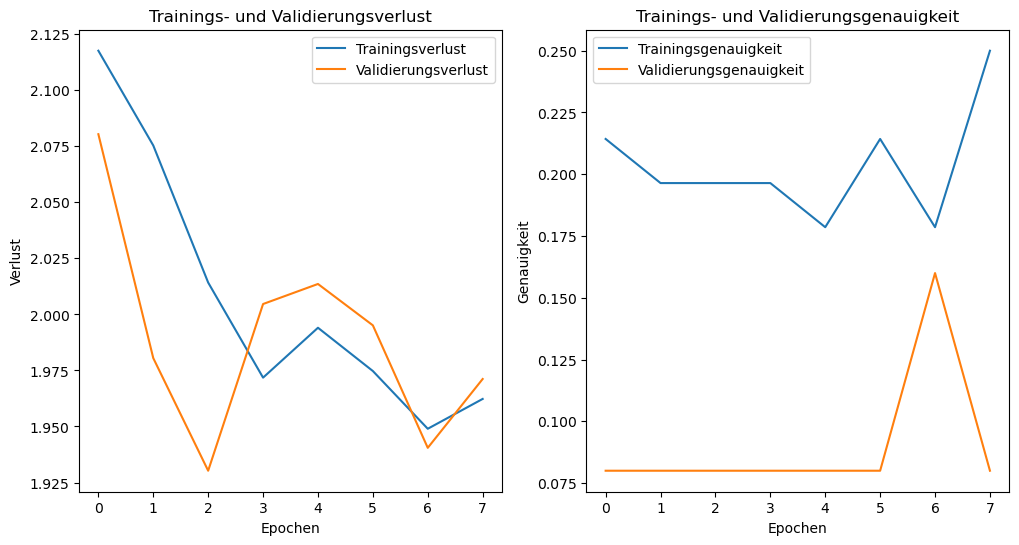

In [67]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Trainingsverlust')
plt.plot(history.history['val_loss'], label='Validierungsverlust')
plt.title('Trainings- und Validierungsverlust')
plt.xlabel('Epochen')
plt.ylabel('Verlust')
plt.legend()

# Plot für Trainings- und Validierungsgenauigkeit
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Trainingsgenauigkeit')
plt.plot(history.history['val_accuracy'], label='Validierungsgenauigkeit')
plt.title('Trainings- und Validierungsgenauigkeit')
plt.xlabel('Epochen')
plt.ylabel('Genauigkeit')
plt.legend()

plt.show()